<font color=magenta> Lixandru Andreea Bianca GR10LF382
<br> Pepene Adina-Florentina GR10LF382

# Laborator 11

Folosind un set de date - de exemplu de la https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=&numIns=&type=text&sort=taskDown&view=table - sa se rezolve o problema de clasificare sau regresie, plecand de la intrari de tip text.

Se poate opta pentru codificare BOW, n-grams, word2vec sau altele adecvate. Modelele de predictie pot fi din biblioteca scikit-learn. Puteti folosi pentru preprocesare biblioteca [NLTK](https://www.nltk.org) etc.

Pentru clasificare se va optimiza scorul F1; se vor raporta scorurile F1 si acuratetea. Pentru regresie se va optimiza scorul mean squared error; se vor raporta scorurile MSE, mean absolute error, r2.

Exemple:
1. [Clasificare de SMS-uri](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)
1. [Sentence Classification Data Set](https://archive.ics.uci.edu/ml/datasets/Sentence+Classification#)
1. [Sentiment Labelled Sentences Data Set](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)
1. [Victorian Era Authorship Attribution Data Set](https://archive.ics.uci.edu/ml/datasets/Victorian+Era+Authorship+Attribution)
1. [Amazon Commerce reviews set Data Set](https://archive.ics.uci.edu/ml/datasets/Amazon+Commerce+reviews+set)
1. [Farm Ads Data Set](https://archive.ics.uci.edu/ml/datasets/Farm+Ads)
1. etc...


Se vor investiga minim 2 seturi de date si pentru fiecare din ele minim 4 modele de clasificare sau regresie. Daca setul de date e deja impartit in train si test, se va folosi ca atare - setul de antrenare se va imparti, suplimentar in train + validation; altfel, se va face kfold CV, k=5. Valorile optimale ale hiperparametrilor vor fi alesi prin random search si grid search.

Pentru fiecare set de date:
1. (2 x 0.5 p) Se descrie setul de date, in limba romana (continut, provenienta, problema etc.)
1. (2 x 1 p) Se face analiza exploratorie, folosind cod Python: distributia claselor sau a valorilor continue de iesire - numeric si grafic, statistici asupra textelor (de exemplu: lungime minima/medie/maxima; cele mai frecvente k cuvinte; clustering etc.). Se va explica fiecare pas si ce se urmareste prin efectuarea lui. Graficele vor avea axele numite (ce se reprezinta, evetual unitate de masura)
1. (2 x 0.5 p) Se face preprocesare de date; se explica in limba romana care sunt metodele de preprocesare folosite, efectul lor pe datele de intrare, ce forma are iesirea obtinuta; se arata efectele pasilor de preprocesare asupra setului de date (noul numar de documente, dinamica vocabularului, trasaturile rezultate etc.) Se pot aduga grafice si tabele la acest pas.
1. (2 x 4 x 0.5 p) Clasificare sau regresie, dupa caz: se face o descriere a modelelor considerate, in limba romana; se descrie modalitatea de cautare a hiperparametrilor; rezultatele obtinute se vor prezenta tabelar, similar cu tema precedenta. 

Se acorda doua puncte din oficiu.

Descrierea modelelor si a pasilor de preprocesare pot fi in sectiuni separate, cu referinte la acestea unde e necesar. Partea specifica aplicarii pasilor pe datele considerate va fi prezentata respectand ordinea de aplicare. 

Exemple:
1. [Working With Text Data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
1. [Text Classification with Python and Scikit-Learn](https://stackabuse.com/text-classification-with-python-and-scikit-learn/)
1. [How to Prepare Text Data for Machine Learning with scikit-learn](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)

Predarea temei se va face prin platforma de elearning in saptamana 25-29 mai.

In [1]:
import pandas as pd 
import numpy as np
from typing import List

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [2]:
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
# Pandas version: 1.0.1
# Numpy version: 1.18.1

Pandas version: 1.0.1
Numpy version: 1.18.1


# Citirea datelor 

### <font color="blue"> Pentru primul set de date

In [3]:
dataset_sms = pd.read_csv('Data/smsspamcollection/SMSSpamCollection', sep = '\t', names = ['category', 'message'])
dataset_sms.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
'''Transformam trasaturile de predictie din "ham" si "spam" in "0" si "1" '''
dataset_sms = dataset_sms.replace(['ham', 'spam'], [0, 1])
dataset_sms.head()

,category,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
dataset_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   int64 
 1   message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
'''Observam ca setul de date nu contine date echilibrate
avem 4825 de inregistrari pentru clasa 0 si 747 de inregistrari 
pentru clasa 1. De asemenea, observam textul cel mai frecvent
din cele doua clase si nr de ocurente.'''

dataset_sms.groupby('category').describe()

message                                                            \
           count unique                                                top   
category                                                                     
0           4825   4516                             Sorry, I'll call later   
1            747    653  Please call our customer service representativ...   

               
         freq  
category       
0          30  
1           4

### <font color="blue"> Pentru al doilea set de date

In [7]:
dataset_sentiment = pd.read_csv('Data/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt', 
                                sep = '\t', names = ['message', 'class'])
dataset_sentiment.head()

,message,class
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
dataset_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  1000 non-null   object
 1   class    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
'''Observam ca setul de date este echilibrat, continand 500 de inregistrari 
de clasa 0 si 500 de inregistrari de clasa 1. Cel mai frcvent text are 2 
repetitii semn ca nu intalnim acelasi text foarte des(avem 497, 499 de 
inregistrari unice din 500,500)'''

dataset_sentiment.groupby('class').describe()

message                                    
        count unique                     top freq
class                                            
0         500    497  The food was terrible.    2
1         500    499      I love this place.    2

# Separarea datelor

### <font color="blue"> Pentru primul set de date

In [10]:
X_sms = dataset_sms.message
Y_sms = dataset_sms.category
print(X_sms[:5])
print(Y_sms[:5])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object
0    0
1    0
2    1
3    0
4    0
Name: category, dtype: int64


In [11]:
print('Cum este organizat textul: ', type(X_sms))
print('Cate date text sunt in serie: ', len(X_sms))
print('Primul text: ', X_sms[0])
print('Categoria asociata: ', Y_sms[0])
print('Tipul de categorii {0} si numarul de categorii din setul de date {1}'.format(np.unique(Y_sms), 
                                                                                    len(np.unique(Y_sms))))
print('Numarul de date din fiecare categorie: {0}'.format(np.bincount(Y_sms)))

Cum este organizat textul:  <class 'pandas.core.series.Series'>
Cate date text sunt in serie:  5572
Primul text:  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Categoria asociata:  0
Tipul de categorii [0 1] si numarul de categorii din setul de date 2
Numarul de date din fiecare categorie: [4825  747]


### <font color="blue"> Pentru al doilea set de date

In [12]:
X_sentiment = dataset_sentiment.message
Y_sentiment = dataset_sentiment['class']

print(X_sentiment[:5])
print(Y_sentiment[:5])

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: message, dtype: object
0    1
1    0
2    0
3    1
4    1
Name: class, dtype: int64


In [13]:
print('Cum este organizat textul: ', type(X_sentiment))
print('Cate date text sunt in serie: ', len(X_sentiment))
print('Primul text: ', X_sentiment[0])
print('Clasa asociata: ', Y_sentiment[0])
print('Tipul de clase {0} si numarul de clase din setul de date {1}'.format(np.unique(Y_sentiment), 
                                                                                    len(np.unique(Y_sentiment))))
print('Numarul de date din fiecare clasa {0}'.format(np.bincount(Y_sentiment)))

Cum este organizat textul:  <class 'pandas.core.series.Series'>
Cate date text sunt in serie:  1000
Primul text:  Wow... Loved this place.
Clasa asociata:  1
Tipul de clase [0 1] si numarul de clase din setul de date 2
Numarul de date din fiecare clasa [500 500]


# Reprezentarea textului sub forma bag of words

### <font color="blue"> Pentru primul set de date

In [14]:
vect_sms = CountVectorizer(min_df = 5)
vect_sms.fit(X_sms)

print(vect_sms.vocabulary_) # cuvintele distincte din texte

{'go': 656, 'until': 1636, 'point': 1196, 'crazy': 400, 'available': 187, 'only': 1112, 'in': 781, 'bugis': 272, 'great': 671, 'world': 1766, 'la': 849, 'cine': 341, 'there': 1537, 'got': 667, 'wat': 1693, 'ok': 1101, 'lar': 856, 'joking': 823, 'wif': 1733, 'free': 609, 'entry': 529, 'wkly': 1751, 'comp': 366, 'to': 1570, 'win': 1738, 'cup': 408, 'final': 582, 'may': 962, 'text': 1521, 'receive': 1262, 'question': 1233, 'std': 1459, 'txt': 1616, 'rate': 1245, 'apply': 158, 'dun': 495, 'say': 1328, 'so': 1416, 'early': 501, 'already': 132, 'then': 1536, 'nah': 1045, 'don': 475, 'think': 1542, 'he': 707, 'goes': 658, 'usf': 1648, 'around': 168, 'here': 718, 'though': 1551, 'freemsg': 610, 'hey': 719, 'darling': 422, 'it': 806, 'been': 219, 'week': 1706, 'now': 1082, 'and': 143, 'no': 1068, 'word': 1760, 'back': 200, 'like': 889, 'some': 1420, 'fun': 626, 'you': 1804, 'up': 1637, 'for': 601, 'still': 1460, 'xxx': 1783, 'send': 1354, '50': 62, 'even': 535, 'my': 1042, 'brother': 266, 'is':

In [15]:
# vocabular sortat in ordine alfabetica
print(sorted(vect_sms.vocabulary_.items(), key = lambda item: item[1]))

[('00', 0), ('000', 1), ('02', 2), ('03', 3), ('04', 4), ('06', 5), ('0800', 6), ('08000839402', 7), ('08000930705', 8), ('0870', 9), ('08707509020', 10), ('08712300220', 11), ('08712460324', 12), ('08718720201', 13), ('09050090044', 14), ('10', 15), ('100', 16), ('1000', 17), ('10am', 18), ('10p', 19), ('11', 20), ('11mths', 21), ('12', 22), ('12hrs', 23), ('1327', 24), ('150', 25), ('150p', 26), ('150pm', 27), ('150ppm', 28), ('16', 29), ('18', 30), ('1st', 31), ('1x150p', 32), ('20', 33), ('200', 34), ('2000', 35), ('2003', 36), ('2004', 37), ('20p', 38), ('21', 39), ('25', 40), ('250', 41), ('25p', 42), ('28', 43), ('2day', 44), ('2lands', 45), ('2mrw', 46), ('2nd', 47), ('2nite', 48), ('2optout', 49), ('30', 50), ('300', 51), ('3030', 52), ('350', 53), ('3510i', 54), ('36504', 55), ('3g', 56), ('3rd', 57), ('400', 58), ('40gb', 59), ('4th', 60), ('4u', 61), ('50', 62), ('500', 63), ('5000', 64), ('50p', 65), ('530', 66), ('5wb', 67), ('5we', 68), ('60p', 69), ('62468', 70), ('750'

In [16]:
BOW_sms = vect_sms.transform(X_sms)

In [17]:
print(f'Reprezentarea ca vectori rari\n:\b{BOW_sms}')
print('Reprezentarea ca vectori:\n', BOW_sms.toarray())

Reprezentarea ca vectori rari
:  (0, 187)	1
  (0, 272)	1
  (0, 341)	1
  (0, 400)	1
  (0, 656)	1
  (0, 667)	1
  (0, 671)	1
  (0, 781)	1
  (0, 849)	1
  (0, 1112)	1
  (0, 1196)	1
  (0, 1537)	1
  (0, 1636)	1
  (0, 1693)	1
  (0, 1766)	1
  (1, 823)	1
  (1, 856)	1
  (1, 1101)	1
  (1, 1733)	1
  (2, 158)	1
  (2, 366)	1
  (2, 408)	1
  (2, 529)	2
  (2, 582)	1
  (2, 609)	1
  :	:
  (5570, 213)	1
  (5570, 276)	1
  (5570, 278)	1
  (5570, 446)	1
  (5570, 513)	1
  (5570, 601)	1
  (5570, 609)	1
  (5570, 636)	1
  (5570, 681)	1
  (5570, 707)	1
  (5570, 781)	1
  (5570, 792)	1
  (5570, 806)	1
  (5570, 889)	1
  (5570, 1060)	1
  (5570, 1420)	1
  (5570, 1425)	1
  (5570, 1531)	1
  (5570, 1570)	1
  (5570, 1644)	1
  (5570, 1706)	1
  (5571, 808)	2
  (5571, 1047)	1
  (5571, 1570)	1
  (5571, 1602)	1
Reprezentarea ca vectori:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
print(f'Dimensiune vocabular: {len(vect_sms.vocabulary_)}')

Dimensiune vocabular: 1813


In [19]:
#obtinerea vocabularului
feature_names_sms = vect_sms.get_feature_names()
print('Dimensiunea vocabularului:', len(feature_names_sms))

Dimensiunea vocabularului: 1813


In [20]:
print(feature_names_sms[:20])

['00', '000', '02', '03', '04', '06', '0800', '08000839402', '08000930705', '0870', '08707509020', '08712300220', '08712460324', '08718720201', '09050090044', '10', '100', '1000', '10am', '10p']


### <font color="blue"> Pentru al doilea set de date

In [21]:
vect_sentiment = CountVectorizer(min_df = 5)
vect_sentiment.fit(X_sentiment)

print(vect_sentiment.vocabulary_) # cuvintele distincte din texte

{'loved': 160, 'this': 289, 'place': 208, 'is': 148, 'not': 184, 'good': 124, 'tasty': 272, 'and': 13, 'the': 279, 'was': 313, 'just': 150, 'by': 52, 'during': 82, 'may': 166, 'off': 188, 'it': 149, 'selection': 238, 'on': 190, 'menu': 171, 'great': 126, 'so': 252, 'were': 320, 'prices': 215, 'now': 186, 'am': 9, 'getting': 120, 'want': 311, 'my': 177, 'pho': 206, 'didn': 71, 'taste': 269, 'that': 278, 'fresh': 112, 'like': 155, 'you': 335, 'could': 63, 'tell': 273, 'they': 285, 'had': 127, 'been': 37, 'made': 162, 'up': 301, 'of': 187, 'time': 291, 'being': 40, 'kept': 151, 'fries': 116, 'too': 294, 'service': 243, 'very': 305, 'would': 333, 'go': 122, 'back': 29, 'no': 183, 'what': 321, 'ever': 92, 'to': 293, 'say': 234, 'still': 261, 'overpriced': 203, 'tried': 297, 'chicken': 56, 'with': 328, 'because': 35, 'pretty': 213, 'sure': 263, 'only': 193, 'waitress': 310, 'little': 156, 'slow': 250, 'in': 146, 'worth': 332, 'your': 336, 'vegas': 304, 'did': 70, 'at': 22, 'all': 6, 'food': 

In [22]:
# vocabular sortat in ordine alfabetica
print(sorted(vect_sentiment.vocabulary_.items(), key = lambda item: item[1]))

[('10', 0), ('30', 1), ('about', 2), ('absolutely', 3), ('after', 4), ('again', 5), ('all', 6), ('also', 7), ('always', 8), ('am', 9), ('amazing', 10), ('ambiance', 11), ('an', 12), ('and', 13), ('another', 14), ('any', 15), ('anytime', 16), ('are', 17), ('area', 18), ('around', 19), ('as', 20), ('asked', 21), ('at', 22), ('atmosphere', 23), ('attentive', 24), ('authentic', 25), ('avoid', 26), ('away', 27), ('awesome', 28), ('back', 29), ('bacon', 30), ('bad', 31), ('bar', 32), ('barely', 33), ('be', 34), ('because', 35), ('beef', 36), ('been', 37), ('beer', 38), ('before', 39), ('being', 40), ('best', 41), ('better', 42), ('bit', 43), ('bland', 44), ('both', 45), ('bread', 46), ('breakfast', 47), ('bring', 48), ('buffet', 49), ('burger', 50), ('but', 51), ('by', 52), ('came', 53), ('can', 54), ('check', 55), ('chicken', 56), ('chips', 57), ('clean', 58), ('cold', 59), ('come', 60), ('coming', 61), ('cooked', 62), ('could', 63), ('customer', 64), ('day', 65), ('deal', 66), ('definitely

In [23]:
BOW_sentiment = vect_sentiment.transform(X_sentiment)

In [24]:
print(f'Reprezentarea ca vectori rari\n:\b{BOW_sentiment}')
print('Reprezentarea ca vectori:\n', BOW_sentiment.toarray())

Reprezentarea ca vectori rari
:  (0, 160)	1
  (0, 208)	1
  (0, 289)	1
  (1, 124)	1
  (1, 148)	1
  (1, 184)	1
  (2, 13)	1
  (2, 150)	1
  (2, 184)	1
  (2, 272)	1
  (2, 279)	1
  (2, 313)	1
  (3, 13)	1
  (3, 52)	1
  (3, 82)	1
  (3, 149)	1
  (3, 160)	1
  (3, 166)	1
  (3, 188)	1
  (3, 279)	1
  (4, 13)	1
  (4, 126)	1
  (4, 171)	1
  (4, 190)	1
  (4, 215)	1
  :	:
  (998, 264)	1
  (998, 279)	1
  (998, 288)	1
  (998, 291)	1
  (998, 293)	1
  (998, 313)	1
  (998, 317)	1
  (999, 20)	1
  (999, 48)	1
  (999, 52)	1
  (999, 55)	1
  (999, 90)	1
  (999, 144)	1
  (999, 146)	1
  (999, 149)	1
  (999, 177)	1
  (999, 187)	1
  (999, 199)	1
  (999, 279)	3
  (999, 282)	1
  (999, 283)	1
  (999, 285)	1
  (999, 291)	1
  (999, 293)	1
  (999, 295)	1
Reprezentarea ca vectori:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(f'Dimensiune vocabular: {len(vect_sentiment.vocabulary_)}')

Dimensiune vocabular: 337


In [26]:
#obtinerea vocabularului
feature_names_sentiment = vect_sentiment.get_feature_names()
print('Dimensiunea vocabularului:', len(feature_names_sentiment))

Dimensiunea vocabularului: 337


In [27]:
print(feature_names_sentiment[:20])

['10', '30', 'about', 'absolutely', 'after', 'again', 'all', 'also', 'always', 'am', 'amazing', 'ambiance', 'an', 'and', 'another', 'any', 'anytime', 'are', 'area', 'around']


# Statistica

### <font color="blue"> Pentru primul set de date

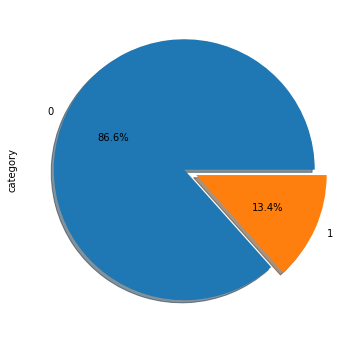

In [28]:
dataset_sms['category'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), 
                                            autopct = '%1.1f%%', shadow = True)
plt.show()

In [29]:
dataset_sms['message_len'] = dataset_sms['message'].astype(str).apply(len)
dataset_sms['word_count'] = dataset_sms['message'].apply(lambda x: len(str(x).split()))

[]

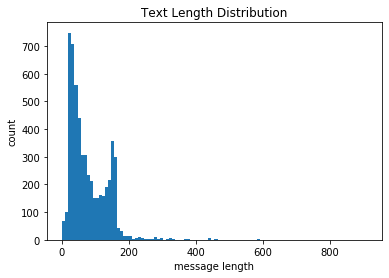

In [30]:
dataset_sms['message_len'].plot(kind = 'hist', bins = 100, title = 'Text Length Distribution')
plt.ylabel('count')
plt.xlabel('message length')
plt.plot()

[]

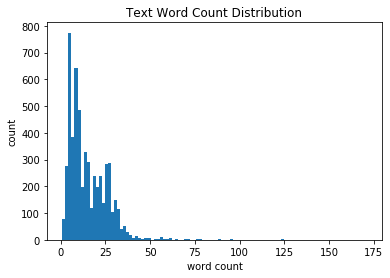

In [31]:
dataset_sms['word_count'].plot(kind = 'hist', bins = 100, title = 'Text Word Count Distribution')
plt.ylabel('count')
plt.xlabel('word count')
plt.plot()

### <font color="blue"> Pentru al doilea set de date

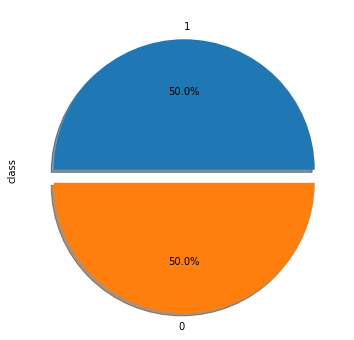

In [32]:
dataset_sentiment['class'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), 
                                            autopct = '%1.1f%%', shadow = True)
plt.show()

In [33]:
dataset_sentiment['message_len'] = dataset_sentiment['message'].astype(str).apply(len)
dataset_sentiment['word_count'] = dataset_sentiment['message'].apply(lambda x: len(str(x).split()))

[]

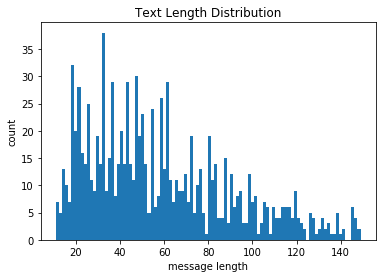

In [34]:
dataset_sentiment['message_len'].plot(kind = 'hist', bins = 100, title = 'Text Length Distribution')
plt.ylabel('count')
plt.xlabel('message length')
plt.plot()

[]

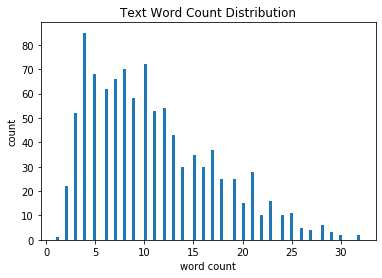

In [35]:
dataset_sentiment['word_count'].plot(kind = 'hist', bins = 100, title = 'Text Word Count Distribution')
plt.ylabel('count')
plt.xlabel('word count')
plt.plot()

# Eliminare cuvinte neinformative (stopwords)

### <font color="blue"> Pentru primul set de date

In [36]:
vect_sms = CountVectorizer(max_df = 4, stop_words = 'english')
vect_sms.fit_transform(X_sms)
print('Dimensiune vocabular: ', len(vect_sms.get_feature_names()))

Dimensiune vocabular:  6841


### <font color="blue"> Pentru al doilea set de date

In [37]:
vect_sentiment = CountVectorizer(min_df = 4, stop_words = 'english')
vect_sentiment.fit_transform(X_sentiment)
print('Dimensiune vocabular: ', len(vect_sentiment.get_feature_names()))

Dimensiune vocabular:  282


# Colorarea valorilor maxime si minime

In [38]:
main_list:list = []
intermediar_list:list = []

names:list = ['Model', 'Search', 'train_accuracy', 'train_f1_score', 'test_accuracy', 'test_f1_score']
subset:list = ['train_accuracy', 'train_f1_score', 'test_accuracy', 'test_f1_score']

In [39]:
def highlight_max(s):
    '''
    highlight the maximum in a Series red.
    '''
    is_max = s == s.max()
    
    return ['background-color: green' if v else '' for v in is_max]

In [40]:
def highlight_min(s):
    '''
    highlight the minimum in a Series green.
    '''
    is_min = s == s.min()
    
    return ['background-color: red' if v else '' for v in is_min]

# Cautarea hiperparametrilor 

In [41]:
def search_grid(model, parameters:dict, x:np.ndarray, y:np.ndarray):
    
    '''This function takes the parameters and search for best parameters.
    
    Parameters:
        model - model from sklearn 
        parameters - all the alternatives to the hyperparameters
        x, y - input and output values
    
    It returns the errors.
    '''
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/5)
    
    vect = CountVectorizer(min_df = 4, stop_words = 'english')
    X_train = vect.fit_transform(x_train)

    grid_search = GridSearchCV(estimator = model, param_grid = parameters, 
                            scoring = 'f1_weighted', cv = 5, return_train_score = True, n_jobs=-1)

    grid_search.fit(X_train.toarray(), y_train)
    
    new_x = vect.fit_transform(x)
    return errors(grid_search, new_x.toarray(), y)

In [42]:
def search_random(model, parameters:dict, x:np.ndarray, y:np.ndarray):
    
    '''This function takes the parameters and search for best parameters.
    
    Parameters:
        model - model from sklearn 
        parameters - all the alternatives to the hyperparameters
        x, y - input and output values
    
    It returns the errors.
    '''
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/5)
    
    vect = CountVectorizer(min_df = 4, stop_words = 'english')
    X_train = vect.fit_transform(x_train)
    
    rand_search = RandomizedSearchCV(estimator = model, param_distributions = parameters, 
                            scoring = 'f1_weighted', cv = 5, return_train_score = True, n_jobs=-1)
    rand_search.fit(X_train.toarray(), y_train)
    
    new_x = vect.fit_transform(x)
    return errors(rand_search, new_x.toarray(), y)

# Calcularea erorilor 

In [43]:
def errors(model, x:np.ndarray, y:np.ndarray)-> List[float]:
    
    '''Errors function calculates accuracy and f1_score, 
    mean squared error and median absolute error for model.
    
    Parameters:
        model - model from sklearn 
        x, y - input and output values
        
    Returns a list with mean of errors:
    accuracy_score for train and test data
    f1_score for train and test data
    '''
    
    scores = cross_validate(model, x, y, cv = 5, scoring = ['f1_weighted', 'accuracy'], 
                            return_train_score = True)
    
    result = [scores['train_accuracy'].mean(), scores['test_accuracy'].mean(),
              scores['train_f1_weighted'].mean(), scores['test_f1_weighted'].mean()]
    
    return result

### <font color=magenta> KNeighbour Classifier

In [44]:
def KNN(model, parameters:dict, x:np.ndarray, y:np.ndarray):
    
    '''KNN function get params and do classification based on k-nearest
    neighbors with best parameters generated by grid search and random search.
    It generates the error values.
    
    Parameters:
        model - model from sklearn 
        parameters - all the alternatives to the hyperparameters
        x, y - input and output values
    '''
    
    main_list.append(search_grid(model, parameters, x, y))
    main_list.append(search_random(model, parameters, x, y))
    intermediar_list.append(['KNN', 'GridSearchCV'])
    intermediar_list.append(['KNN', 'RandomizedSearchCV'])

### <font color=magenta> Decision Tree Classifier

In [45]:
def decision_tree(model, parameters:dict, x:np.ndarray, y:np.ndarray):
    
    '''decision_tree function get params and do classification 
    with best parameters generated by grid search and random search.
    It generates the error values.
    
    Parameters:
        model - model from sklearn 
        parameters - all the alternatives to the hyperparameters
        x, y - input and output values
    '''
    
    main_list.append(search_grid(model, parameters, x, y))
    main_list.append(search_random(model, parameters, x, y))
    intermediar_list.append(['Decision tree', 'GridSearchCV'])
    intermediar_list.append(['Decision tree', 'RandomizedSearchCV'])

### <font color=magenta> Random Forest Classifier

In [46]:
def random_forest(model, parameters:dict, x:np.ndarray, y:np.ndarray):
    
    '''random_forest function get params and do classification 
    with best parameters generated by grid search and random search.
    It generates the error values.
    
    Parameters:
        model - model from sklearn 
        parameters - all the alternatives to the hyperparameters
        x, y - input and output values
    '''
    
    main_list.append(search_grid(model, parameters, x, y))
    main_list.append(search_random(model, parameters, x, y))
    intermediar_list.append(['Random Forest', 'GridSearchCV'])
    intermediar_list.append(['Random Forest', 'RandomizedSearchCV'])

### <font color=magenta> Support Vector Classifier

In [47]:
def svc(model, parameters:dict, x:np.ndarray, y:np.ndarray):
    
    '''svc function get params and do classification
    with best parameters generated by grid search and random search.
    It generates the error values.
    
    Parameters:
        model - model from sklearn 
        parameters - all the alternatives to the hyperparameters
        x, y - input and output values
    '''
    
    main_list.append(search_grid(model, parameters, x, y))
    main_list.append(search_random(model, parameters, x, y))
    intermediar_list.append(['SVC', 'GridSearchCV'])
    intermediar_list.append(['SVC', 'RandomizedSearchCV'])

### <font color=magenta> Gaussian process Classifier

In [48]:
def gaussian_process(model, parameters:dict, x:np.ndarray, y:np.ndarray):
    
    '''gaussian_process function get params and do classification
    with best parameters generated by grid search and random search.
    It generates the error values.
    
    Parameters:
        model - model from sklearn 
        parameters - all the alternatives to the hyperparameters
        x, y - input and output values
    '''
    
    main_list.append(search_grid(model, parameters, x, y))
    main_list.append(search_random(model, parameters, x, y))
    intermediar_list.append(['Gaussian process', 'GridSearchCV'])
    intermediar_list.append(['Gaussian process', 'RandomizedSearchCV'])

# Aplicarea modelelor pentru generarea erorilor 

In [49]:
def start_knn(x:np.ndarray, y:np.ndarray):
    
    model_knn = KNeighborsClassifier()
    parameters_knn = {'n_neighbors': [3, 6, 8, 10], 'p': [2, 3, 4], 'metric': ['euclidean'], 'n_jobs': [-1]}
    KNN(model_knn, parameters_knn, x, y)

In [50]:
def start_decision_tree(x:np.ndarray, y:np.ndarray):
    
    model_decision_tree = DecisionTreeClassifier()
    parameters_decision_tree = {'max_leaf_nodes':[5, 10, 20], 'max_depth': [3, 4, 5, 6, 7]}
    decision_tree(model_decision_tree, parameters_decision_tree, x, y)

In [51]:
def start_random_forest(x:np.ndarray, y:np.ndarray):
    
    model_random_forest = RandomForestClassifier()
    parameters_random_forest = {'max_leaf_nodes':[5, 15, 20], 'n_estimators': [80, 100, 120],
                                'max_depth': [3, 5, 6], 'n_jobs': [-1]}
    random_forest(model_random_forest, parameters_random_forest, x, y)

In [52]:
def start_svc(x:np.ndarray, y:np.ndarray):
    
    model_svc = SVC()
    parameters_svc = {'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1], 'C': [0.1, 1, 10]}
    svc(model_svc, parameters_svc, x, y)

In [53]:
def start_gaussian_process(x:np.ndarray, y:np.ndarray):
    
    model_gaussian_process = GaussianProcessClassifier()
    parameters_gaussian_process = {'n_restarts_optimizer': [1, 5, 7, 13],
                                   'max_iter_predict': [100, 150, 200], 'n_jobs': [-1]}
    gaussian_process(model_gaussian_process, parameters_gaussian_process, x, y)

In [54]:
names:list = ['train_accuracy', 'test_accuracy',
              'train_f1_weighted', 'test_f1_weighted']
    
main_list:list = []
intermediar_list:list = []

In [55]:
def start(x:np.ndarray, y:np.ndarray, name:str):
    
    main_list.clear()
    intermediar_list.clear()
    
    start_knn(x, y)
    print ('KNN finished')
    start_decision_tree(x, y)
    print ('decision tree finished')
    start_random_forest(x, y)
    print ('random forest finished')
    start_svc(x, y)
    print ('svc finished')
    start_gaussian_process(x, y)
    print ('gaussian finished')
    
    data_frame = pd.DataFrame(main_list, columns = names)
    intermediar_data_frame = pd.DataFrame(intermediar_list, columns = ['model_name', 'search_strategy'])
    intermediar_data_frame.style

    result_data_frame = pd.concat([intermediar_data_frame, data_frame], axis = 1)
    result_data_frame.style.apply(highlight_max, 
                               subset = pd.IndexSlice[:, names]).apply(highlight_min, 
                                                                       subset = pd.IndexSlice[:, names])
    
    result = pd.DataFrame(result_data_frame, columns=['model_name', 'search_strategy']+names)
    result = result.style.apply(highlight_max, subset= pd.IndexSlice[:, names]).apply(highlight_min,
                                                                                              subset= pd.IndexSlice[:, names])
    
    f=open(f"{name}.html","w")
    f.write(result.render())
    f.close()

### <font color="blue"> Pentru al doilea set de date

In [56]:
start(X_sentiment.to_numpy(), Y_sentiment.to_numpy(), 'Sentiment')

KNN finished
decision tree finished
random forest finished
svc finished
gaussian finished


### <font color="blue"> Pentru primul set de date

In [57]:
start(X_sms.to_numpy(), Y_sms.to_numpy(), 'SMS')

KNN finished
decision tree finished
random forest finished
svc finished
gaussian finished


# Documentatia seturilor de date

### <font color="blue"> Pentru primul set de date


Colecția Spam SMS este un set public de mesaje etichetate prin SMS care au fost colectate pentru cercetarea spam-ului pe telefonul mobil.
<br>Scopul acestui set de date este de a afla daca un text este sau nu spam.
<br>Informatiile data-setului au fost preluate de la surse de cercetare gratuite, printre care se enumera urmatoarele:
<br>[1] GOmez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃa, F. Content Based SMS Spam Filtering.
   <br> Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06),
   <br> Amsterdam, The Netherlands, 10-13,2006. 
<br>[2] Cormack, G. V., GOmez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering.
   <br> Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval
    <br>(ACM SIGIR'07), New York, NY, 871-872, 2007. 
<br>[3] Cormack, G. V., GOmez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. 
   <br> Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07).
    <br>Lisbon, Portugal, 313-320, 2007.
<br>Setul contine categoria mesajelor pe prima coloana(spam, ham) pe care noi le-am convertit astfel: 1 daca este spam si 0 daca este ham, 
dupa care e acompaniat de un text care reprezinta e-mailul.


### <font color="blue"> Pentru al doilea set de date


<br>Informatiile de la acest set de date sunt preluate de la 'From Group to Individual Labels using Deep Features', 
Kotzias et. al,. KDD 2015.
<br>Setul de date contine o recenzie facuta la un film, produs etc si un scor pozitiv sau negativ, 
care arata sentimentul pozitiv sau negativ al textului, atasat fiecaruia.
<br>Scorul este 1 (pentru pozitiv) sau 0 (pentru negativ).
<br>Problema setului de date este de a afla daca un text are o recenzie buna sau proasta. ("sentimentul utilizatorului")
<br>Propozițiile provin de la trei site-uri / câmpuri diferite: imdb.com, amazon.com, yelp.com.
Pentru fiecare site web, există 500 de propoziții pozitive și 500 negative.